In [1]:
import os, shutil
import pandas as pd
import numpy as np

# returns a YOLO formatted bbox 
def to_yolo_format(bboxen, class_names):
    class_idx = class_names.index(bboxen['class'])
    
    # calculate normalized xywh coordinates of bbox 
    x_center = ((bboxen['xmin'] + bboxen['xmax']) / 2.0) / bboxen['width'] 
    y_center = ((bboxen['ymin'] + bboxen['ymax']) / 2.0) / bboxen['height'] 
    width = (bboxen['xmax'] - bboxen['xmin']) / bboxen['width'] 
    height = (bboxen['ymax'] - bboxen['ymin']) / bboxen['height'] 

In [2]:
ROOT_DIR = os.path.abspath(os.getcwd()) # current path of the notebook
DATA_DIR = "/raid/datashare/RSNA2017/"
IMAGE_FILES = os.path.join(DATA_DIR, "boneage-training-dataset/")
TRAIN_BBOXEN = os.path.join(DATA_DIR, "boneage_yolo/train.csv")
VALID_BBOXEN = os.path.join(DATA_DIR, "boneage_yolo/valid.csv")
YOLO_DATASET_ROOT = os.path.join(ROOT_DIR, "boneage_yolo/")

# load ROIs CSVs for training and validation images
train_bboxen = pd.read_csv(TRAIN_BBOXEN, header=0)
valid_bboxen = pd.read_csv(VALID_BBOXEN, header=0)

# extract unique class names
CLASS_NAMES = train_bboxen['class'].unique().tolist()

In [4]:
import os
import shutil
import pandas as pd
import numpy as np

# returns a YOLO formatted bbox 
def to_yolo_format(bboxen, class_names):
    try:
        class_idx = class_names.index(bboxen['class'])
        
        # calculate normalized xywh coordinates of bbox 
        x_center = ((bboxen['xmin'] + bboxen['xmax']) / 2.0) / bboxen['width'] 
        y_center = ((bboxen['ymin'] + bboxen['ymax']) / 2.0) / bboxen['height'] 
        width = (bboxen['xmax'] - bboxen['xmin']) / bboxen['width'] 
        height = (bboxen['ymax'] - bboxen['ymin']) / bboxen['height'] 
        
        return f"{class_idx} {x_center} {y_center} {width} {height}"
    except Exception as e:
        print(f"Error converting bboxen to YOLO format: {e}")
        return None

# Constants (ensure these are correctly set in your actual code)
ROOT_DIR = os.path.abspath(os.getcwd())  # current path of the notebook
DATA_DIR = "/raid/datashare/RSNA2017/"
IMAGE_FILES = os.path.join(DATA_DIR, "boneage-training-dataset/")
TRAIN_BBOXEN = os.path.join(DATA_DIR, "boneage_yolo/train.csv")
VALID_BBOXEN = os.path.join(DATA_DIR, "boneage_yolo/valid.csv")
YOLO_DATASET_ROOT = os.path.join(ROOT_DIR, "boneage_yolo/")

# load ROIs CSVs for training and validation images
train_bboxen = pd.read_csv(TRAIN_BBOXEN, header=0)
valid_bboxen = pd.read_csv(VALID_BBOXEN, header=0)

# extract unique class names
CLASS_NAMES = train_bboxen['class'].unique().tolist()

for split, rois in zip(["train", "valid"], [train_bboxen, valid_bboxen]):
    # create dataset structure if not exists
    os.makedirs(os.path.normpath(f"{YOLO_DATASET_ROOT}/images/{split}/"), exist_ok=True)
    os.makedirs(os.path.normpath(f"{YOLO_DATASET_ROOT}/labels/{split}/"), exist_ok=True)
    
    # iterate over each row of ROIs, convert and save it to YOLO format 
    for _, roi_row in rois.iterrows():
        yolo_format = to_yolo_format(roi_row, CLASS_NAMES)  # convert roi_row into a yolo formatted bbox
        
        if yolo_format is None:
            print(f"Skipping ROI row due to conversion error: {roi_row}")
            continue  # Skip this ROI row if conversion failed

        img_file = roi_row['filename']  # get image filename
        label_file = f"{img_file.split('.')[0]}.txt"  # create yolo label filename as image filename
        
        # copy/overwrite the image file to the correct dataset directory
        shutil.copy(os.path.normpath(f"{IMAGE_FILES}/{img_file}"), os.path.normpath(f"{YOLO_DATASET_ROOT}/images/{split}/{img_file}"))

        # append yolo bbox to label file
        with open(os.path.normpath(f"{YOLO_DATASET_ROOT}/labels/{split}/{label_file}"), "a") as f:
            f.write(yolo_format + '\n')


In [5]:
DATASET_YAML = (f"path: {YOLO_DATASET_ROOT}  # dataset root dir\n"
                "train: images/train  # train images (relative to 'path')\n"
                "val: images/valid  # val images (relative to 'path')\n"
                "test:  # test images (optional)\n"
                "\n"
                "# Classes\n"
                f"nc: {len(CLASS_NAMES)} # number of classes\n"
                f"names: {CLASS_NAMES} # class names")

with open(os.path.normpath(f"{YOLO_DATASET_ROOT}/boneage_yolo.yaml"), "w") as f:
        f.write(DATASET_YAML)

In [6]:
!git clone https://github.com/ultralytics/yolov5 ~/yolov5 # clone yolo repo

fatal: destination path '/home/nimisha.vilayatarani002/yolov5' already exists and is not an empty directory.


In [16]:
from IPython.display import display, HTML

# Define the HTML for buttons with the full URLs
html_buttons = """
<div style="display: flex; justify-content: space-between; width: 400px; margin-top: 20px;">
    <button onclick="window.open('http://172.22.50.111:9000/user/nimisha.vilayatarani002/terminals/1', '_blank')" style="padding: 10px 20px; font-size: 16px;">Open Terminal</button>
    
"""

# Display the HTML
display(HTML(html_buttons))


In [15]:
from IPython.display import display, HTML

# HTML and JavaScript code for the restart kernel button
restart_button = """
<script>
function restartKernel() {
    var response = confirm('Do you really want to restart the kernel? All variables will be lost!');
    if (response == true) {
        var command = 'kernel.restart';
        var callbacks = {
            iopub: {
                output: function(response) {
                    console.log(response.content.text);
                }
            }
        };
        Jupyter.notebook.kernel.execute(command, callbacks);
    }
}
</script>
<button onclick="restartKernel()">Restart Kernel</button>
"""

# Display the button
display(HTML(restart_button))


In [17]:
cd yolov5

/home/nimisha.vilayatarani002/yolov5


In [18]:
pip install --no-cache-dir -r requirements.txt codecarbon

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [19]:
from IPython.display import display, HTML

# HTML and JavaScript code for the restart kernel button
restart_button = """
<script>
function restartKernel() {
    var response = confirm('Do you really want to restart the kernel? All variables will be lost!');
    if (response == true) {
        var command = 'kernel.restart';
        var callbacks = {
            iopub: {
                output: function(response) {
                    console.log(response.content.text);
                }
            }
        };
        Jupyter.notebook.kernel.execute(command, callbacks);
    }
}
</script>
<button onclick="restartKernel()">Restart Kernel</button>
"""

# Display the button
display(HTML(restart_button))


In [20]:
mamba activate

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.


Note: you may need to restart the kernel to use updated packages.


In [1]:
python -m ipykernel install --user --name "diffproml" --display-name "DiffProML (Python 3.12)"

SyntaxError: invalid syntax (1298989254.py, line 1)

In [1]:
mamba create -y -n "diffproml" python=3.12
mamba activate "diffproml"

SyntaxError: invalid syntax (1351906247.py, line 1)


Looking for: ['python=3.12']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
conda-forge/noarch   ━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s[+] 0.2s
conda-forge/linux-64 ━━━━━━━━━━━━━━━━━━━━━━━ 797.1kB /  35.5MB @   4.4MB/s  0.2s
conda-forge/noarch   ━━━━━━━━━━━━━━━━━━━━━━━ 216.4kB /  15.1MB @   1.2MB/s  0.2s[+] 0.3s
conda-forge/linux-64 ━╸━━━━━━━━━━━━━━━━━━━━━   4.4MB /  35.5MB @  15.5MB/s  0.3s
conda-forge/noarch   ━━╸━━━━━━━━━━━━━━━━━━━━   2.5MB /  15.1MB @   8.8MB/s  0.3s[+] 0.4s
conda-forge/linux-64 ━━━━╸━━━━━━━━━━━━━━━━━━   9.5MB /  35.5MB @  24.4MB/s  0.4s
conda-forge/noarch   ━━━━━━━━━━╸━━━━━━━━━━━━   7.5MB /  15.1MB @  19.5MB/s  0.4s[+] 0.5s
conda-forge/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━  14.3MB /  35.5MB @  29.3MB/s  0.5s
conda-forge/noarch   ━━━━━━━━━━━━━━━━━╸━━━━━  12.4MB /  15.1MB @  25.7MB/s  0.5s[+] 0.6s
conda-forge/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━  14.3MB /  35.5MB @  29.3MB/s  0.6s
conda-forge/noarch  

In [3]:
mamba activate "diffproml"

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.


Note: you may need to restart the kernel to use updated packages.


In [1]:
from codecarbon import EmissionsTracker

YOLO_DATASET_ROOT = "/raid/jupyterhub/datasets/boneage_yolo/" # do not change this path as it contains the Yolo pre-processed dataset

tracker = EmissionsTracker(measure_power_secs=9999)
tracker.start()

try:
    %cd yolov5
    !python train.py --img 640 --batch 24 --epochs 5 --data $YOLO_DATASET_ROOT/boneage_yolo.yaml --weights yolov5s.pt
finally:
    emissions = tracker.stop() 
    
print(f"~{emissions * 1_000}g CO2 produced")

[codecarbon WARNING @ 10:53:44] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 10:53:44] [setup] RAM Tracking...
[codecarbon INFO @ 10:53:44] [setup] GPU Tracking...
[codecarbon INFO @ 10:53:44] No GPU found.
[codecarbon INFO @ 10:53:44] [setup] CPU Tracking...
[codecarbon WARNING @ 10:53:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:53:46] We saw that you have a Intel(R) Xeon(R) CPU E5-2698 v4 @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:53:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU E5-2698 v4 @ 2.20GHz
[codecarbon INFO @ 10:53:46] >>> Tracker's metadata:
[codecarbon INFO @ 10:53:46]   Platform system: Linux-5.4.0-174-generic-x86_64-with-glibc2.35
[codecarbon INFO @ 10:53:46]   Python version: 3.11.8
[codecarbon INFO @ 10:53:46]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 10:53:46]   Available RAM : 503.767 GB
[codecarbon INFO @ 10:53:46]   CPU count: 80


/home/nimisha.vilayatarani002/yolov5
train: weights=yolov5s.pt, cfg=, data=/raid/jupyterhub/datasets/boneage_yolo//boneage_yolo.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=24, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 4), reused 6 (delta 3), pack-reused 0
Unpacking objects: 100% (12/12), 15.05 KiB | 19

[codecarbon INFO @ 10:54:16] Energy consumed for RAM : 0.001450 kWh. RAM Power : 188.91272735595703 W
[codecarbon INFO @ 10:54:16] Energy consumed for all CPUs : 0.000326 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:54:16] 0.001777 kWh of electricity used since the beginning.


~0.6847513460761002g CO2 produced


/home/nimisha.vilayatarani002/.local/lib/python3.11/site-packages/codecarbon/output_methods/file.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(data.values)])])


In [2]:
model_weights = "~/yolov5/runs/train/exp/weights/best.pt" # set path to trained model weights
YOLO_DATASET_ROOT = "/raid/jupyterhub/datasets/boneage_yolo/" # do not change this path as it contains the Yolo pre-processed dataset

!python val.py --img 640 --batch 24 --iou-thres 0.6 --data $YOLO_DATASET_ROOT/boneage_yolo.yaml --weights $model_weights

val: data=/raid/jupyterhub/datasets/boneage_yolo//boneage_yolo.yaml, weights=['/home/nimisha.vilayatarani002/yolov5/runs/train/exp/weights/best.pt'], batch_size=24, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.11.8 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /raid/jupyterhub/datasets/boneage_yolo/labels/valid... 89 images, 
val: WARNING ⚠️ Cache directory /raid/jupyterhub/datasets/boneage_yolo/labels is not writeable: [Errno 13] Permission denied: '/raid/jupyterhub/datasets/boneage_yolo/labels/valid.cache.npy'
                 Class     Images  Instances          P          R      mAP50   
                   all         89       1513      0.876   

In [3]:
# %cd yolov5 # switch to the yolo directory in case of import erros 
import glob, torch, os
import pandas as pd
from PIL import Image

In [5]:
# load list of images of image file names
def load_images(image_files: list):
    return [Image.open(file).convert("RGB") for file in image_files]

N = 1 # number of visualized images
YOLO_DATASET_ROOT = "/raid/jupyterhub/datasets/boneage_yolo/" # do not change this path as it contains the Yolo pre-processed dataset
IMAGES = YOLO_DATASET_ROOT + "images/valid/" # path to validation image files
img_files = sorted(glob.glob(IMAGES + '*.png'))[:N] # get fist N image filenames
imgs = load_images(img_files) # load images to list

In [9]:
# load list of images of image file names
def load_images(image_files: list):
    return [Image.open(file).convert("RGB") for file in image_files]

N = 1 # number of visualized images
YOLO_DATASET_ROOT = "/raid/jupyterhub/datasets/boneage_yolo/" # do not change this path as it contains the Yolo pre-processed dataset
IMAGES = YOLO_DATASET_ROOT + "images/valid/" # path to validation image files
img_files = sorted(glob.glob(IMAGES + '*.png'))[:N] # get fist N image filenames
imgs = load_images(img_files) # load images to list

In [10]:
# Inference settings
model.conf = 0.6 # min. confidence of 0.6
model.iou = 0.6 # min IoU of 0.6 for none-max-suppression (filtering of overlapping bboxes)

# iterate over images
for i, img in enumerate(imgs):
    result = model(img, size=640) # nms inference for single image
    result.print() # print inference results
    with pd.option_context('display.float_format', '{:0.3f}'.format): # print coordinates of bboxes 
        print(result.pandas().xyxy[0]) 
    result.show() # show inference results
    
    #result.save(ROOT_DIR + "/BoneAgeInference"+ str(i) + ".png")
    result.save()

NameError: name 'model' is not defined

In [11]:
model_weights = f"{os.path.expanduser('~')}/yolov5/runs/train/exp/weights/best.pt" # set path to trained model weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_weights) # load model

Using cache found in /home/nimisha.vilayatarani002/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-12 Python-3.11.8 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [12]:
# load list of images of image file names
def load_images(image_files: list):
    return [Image.open(file).convert("RGB") for file in image_files]

N = 1 # number of visualized images
YOLO_DATASET_ROOT = "/raid/jupyterhub/datasets/boneage_yolo/" # do not change this path as it contains the Yolo pre-processed dataset
IMAGES = YOLO_DATASET_ROOT + "images/valid/" # path to validation image files
img_files = sorted(glob.glob(IMAGES + '*.png'))[:N] # get fist N image filenames
imgs = load_images(img_files) # load images to list

image 1/1: 1200x905 4 DIPs, 6 PIPs, 5 MCPs, 1 Wrist
Speed: 6.8ms pre-process, 250.5ms inference, 2.3ms NMS per image at shape (1, 3, 640, 512)


      xmin    ymin    xmax    ymax  confidence  class   name
0  427.386 459.165 509.927 559.775       0.842      2    MCP
1  354.464 501.242 428.642 597.314       0.817      2    MCP
2  323.231 230.565 373.683 304.950       0.813      0    DIP
3  330.944 696.979 660.205 933.937       0.810      5  Wrist
4  593.208 215.340 657.175 285.869       0.791      0    DIP
5  447.977 176.479 505.782 250.100       0.789      0    DIP
6  575.909 301.817 644.274 364.662       0.782      1    PIP
7  525.188 455.565 624.297 559.872       0.781      2    MCP
8  272.357 550.660 355.017 645.394       0.766      2    MCP
9  326.507 327.509 393.718 411.823       0.765      1    PIP
10 442.942 274.170 511.621 358.321       0.764      1    PIP
11 565.154 295.862 654.899 377.129       0.757      1    PIP
12 680.675 591.981 756.533 675.777       0.751      2    MCP
13 155.606 416.660 212.441 478.169       0.732      0    DIP
14 197.834 461.488 252.802 534.445       0.699      1    PIP
15 761.933 494.351 829.9

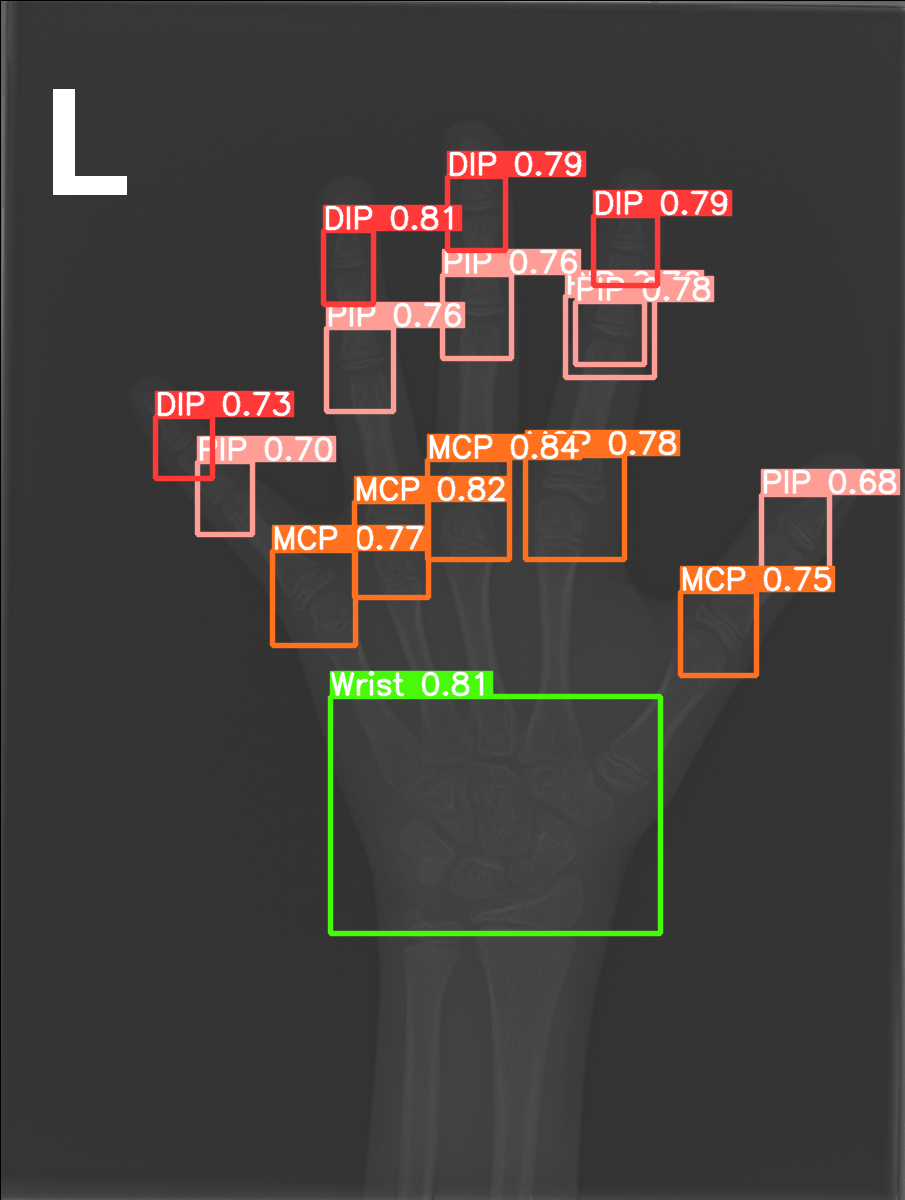

Saved 1 image to runs/detect/exp


In [13]:
# Inference settings
model.conf = 0.6 # min. confidence of 0.6
model.iou = 0.6 # min IoU of 0.6 for none-max-suppression (filtering of overlapping bboxes)

# iterate over images
for i, img in enumerate(imgs):
    result = model(img, size=640) # nms inference for single image
    result.print() # print inference results
    with pd.option_context('display.float_format', '{:0.3f}'.format): # print coordinates of bboxes 
        print(result.pandas().xyxy[0]) 
    result.show() # show inference results
    
    #result.save(ROOT_DIR + "/BoneAgeInference"+ str(i) + ".png")
    result.save()

In [19]:
import pandas as pd

# Load the CSV files
train_df = pd.read_csv('/raid/datashare/RSNA2017/boneage_yolo/train.csv')
valid_df = pd.read_csv('/raid/datashare/RSNA2017/boneage_yolo/valid.csv')

# Display the first few rows of each dataframe
print("Train DataFrame:")
print(train_df.head())

print("\nValidation DataFrame:")
print(valid_df.head())


Train DataFrame:
   filename  width  height class  xmin  ymin  xmax  ymax
0  6429.png   1092    1491   DIP   181   423   288   543
1  6429.png   1092    1491   DIP   344   223   447   337
2  6429.png   1092    1491   DIP   502   136   613   264
3  6429.png   1092    1491   DIP   739   183   841   302
4  6429.png   1092    1491   PIP   906   580  1024   715

Validation DataFrame:
   filename  width  height class  xmin  ymin  xmax  ymax
0  2382.png   1130    1468   DIP   183   580   247   653
1  2382.png   1130    1468   DIP   324   403   385   472
2  2382.png   1130    1468   DIP   508   334   574   412
3  2382.png   1130    1468   DIP   710   386   771   458
4  2382.png   1130    1468   PIP   921   820   991   902


In [20]:
# Load and display the YAML file
with open('/raid/datashare/RSNA2017/boneage_yolo/boneage_yolo.yaml', 'r') as file:
    yolo_yaml = file.read()
    print("YAML File Contents:")
    print(yolo_yaml)


YAML File Contents:
path: /raid/datashare/RSNA2017/boneage_yolo/  # dataset root dir
train: images/train  # train images (relative to 'path')
val: images/valid  # val images (relative to 'path')
test:  # test images (optional)

# Classes
nc: 6 # number of classes
names: ['DIP', 'PIP', 'MCP', 'Radius', 'Ulna', 'Wrist'] # class names



In [21]:
# Extract features and target variable (example)
def prepare_data(df):
    df['width'] = df['xmax'] - df['xmin']
    df['height'] = df['ymax'] - df['ymin']
    features = df[['width', 'height']]
    target = df['class']  # Assuming 'class' is your target variable
    return features, target

# Prepare train and validation data
X_train, y_train = prepare_data(train_df)
X_valid, y_valid = prepare_data(valid_df)


In [2]:
import pandas as pd

# Load the CSV files
train_df = pd.read_csv('/raid/datashare/RSNA2017/boneage_yolo/train.csv')
valid_df = pd.read_csv('/raid/datashare/RSNA2017/boneage_yolo/valid.csv')

# Display the first few rows of each dataframe
print("Train DataFrame:")
print(train_df.head())

print("\nValidation DataFrame:")
print(valid_df.head())


Train DataFrame:
   filename  width  height class  xmin  ymin  xmax  ymax
0  6429.png   1092    1491   DIP   181   423   288   543
1  6429.png   1092    1491   DIP   344   223   447   337
2  6429.png   1092    1491   DIP   502   136   613   264
3  6429.png   1092    1491   DIP   739   183   841   302
4  6429.png   1092    1491   PIP   906   580  1024   715

Validation DataFrame:
   filename  width  height class  xmin  ymin  xmax  ymax
0  2382.png   1130    1468   DIP   183   580   247   653
1  2382.png   1130    1468   DIP   324   403   385   472
2  2382.png   1130    1468   DIP   508   334   574   412
3  2382.png   1130    1468   DIP   710   386   771   458
4  2382.png   1130    1468   PIP   921   820   991   902


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the datasets
train_df = pd.read_csv('/raid/datashare/RSNA2017/boneage_yolo/train.csv')
valid_df = pd.read_csv('/raid/datashare/RSNA2017/boneage_yolo/valid.csv')

# Combine train and validation datasets to ensure consistent encoding
combined_df = pd.concat([train_df, valid_df])

# Encode the class labels
le = LabelEncoder()
combined_df['class'] = le.fit_transform(combined_df['class'])

# Split back into train and validation sets
train_df = combined_df.iloc[:len(train_df)]
valid_df = combined_df.iloc[len(train_df):]

# Define features (X) and target (y)
X_train = train_df.drop(['filename', 'xmin', 'ymin', 'xmax', 'ymax'], axis=1)
y_train = train_df[['xmin', 'ymin', 'xmax', 'ymax']].values  # Ensure y_train is 2D
X_valid = valid_df.drop(['filename', 'xmin', 'ymin', 'xmax', 'ymax'], axis=1)
y_valid = valid_df[['xmin', 'ymin', 'xmax', 'ymax']].values  # Ensure y_valid is 2D


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
train_df = pd.read_csv('/raid/datashare/RSNA2017/boneage_yolo/train.csv')
valid_df = pd.read_csv('/raid/datashare/RSNA2017/boneage_yolo/valid.csv')

# Combine train and validation datasets to ensure consistent encoding
combined_df = pd.concat([train_df, valid_df])

# Encode the class labels
le = LabelEncoder()
combined_df['class'] = le.fit_transform(combined_df['class'])

# Split back into train and validation sets
train_df = combined_df.iloc[:len(train_df)]
valid_df = combined_df.iloc[len(train_df):]

# Define features (X) and target (y)
X_train = train_df.drop(['filename', 'xmin', 'ymin', 'xmax', 'ymax'], axis=1)
y_train = train_df[['xmin', 'ymin', 'xmax', 'ymax']].values  # Ensure y_train is 2D
X_valid = valid_df.drop(['filename', 'xmin', 'ymin', 'xmax', 'ymax'], axis=1)
y_valid = valid_df[['xmin', 'ymin', 'xmax', 'ymax']].values  # Ensure y_valid is 2D

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    if name == 'Support Vector Regressor':
        svr_models = {}
        y_preds = np.zeros_like(y_valid)
        
        for i, target in enumerate(['xmin', 'ymin', 'xmax', 'ymax']):
            svr = SVR()
            svr.fit(X_train, y_train[:, i])
            y_preds[:, i] = svr.predict(X_valid)
            svr_models[target] = svr
        
        mse = mean_squared_error(y_valid, y_preds)
        r2 = r2_score(y_valid, y_preds)
        results[name] = {'MSE': mse, 'R2': r2}
        print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        
        mse = mean_squared_error(y_valid, y_pred)
        r2 = r2_score(y_valid, y_pred)
        
        results[name] = {'MSE': mse, 'R2': r2}
        print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")

# Display results
print("\nModel Comparison:")
for name, result in results.items():
    print(f"{name} - MSE: {result['MSE']:.4f}, R2: {result['R2']:.4f}")


Linear Regression - Mean Squared Error: 43692.02219467589, R-squared: 0.6346023719066136
Decision Tree Regressor - Mean Squared Error: 32133.32184838901, R-squared: 0.710198645706994
Random Forest Regressor - Mean Squared Error: 30107.988332416855, R-squared: 0.7263082679545344
Support Vector Regressor - Mean Squared Error: 79530.62640449438, R-squared: 0.37318387047258844

Model Comparison:
Linear Regression - MSE: 43692.0222, R2: 0.6346
Decision Tree Regressor - MSE: 32133.3218, R2: 0.7102
Random Forest Regressor - MSE: 30107.9883, R2: 0.7263
Support Vector Regressor - MSE: 79530.6264, R2: 0.3732


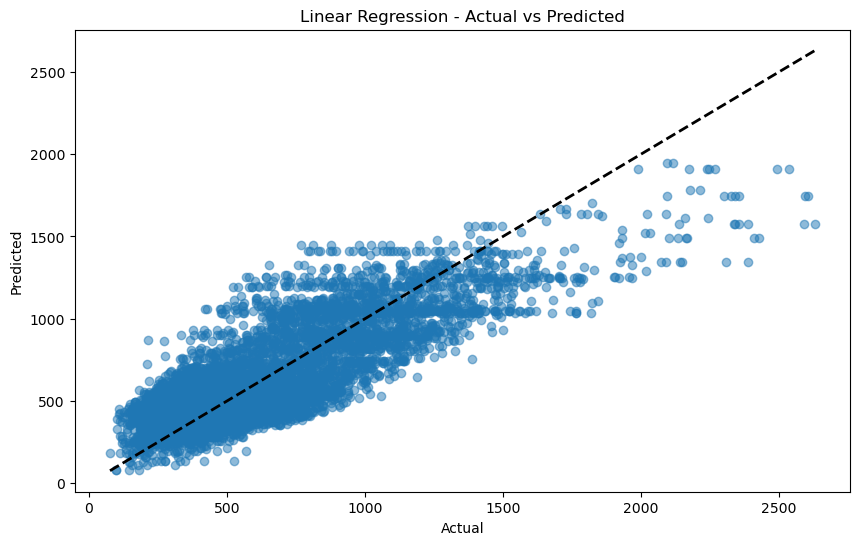

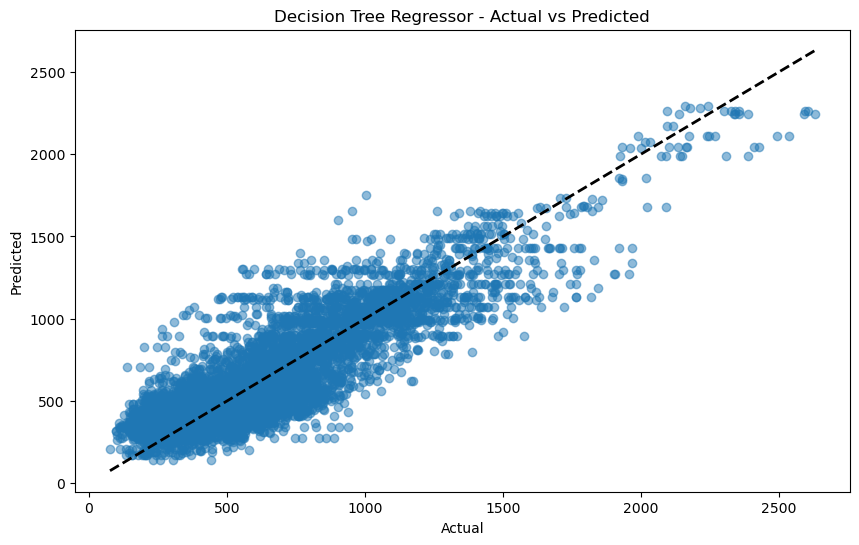

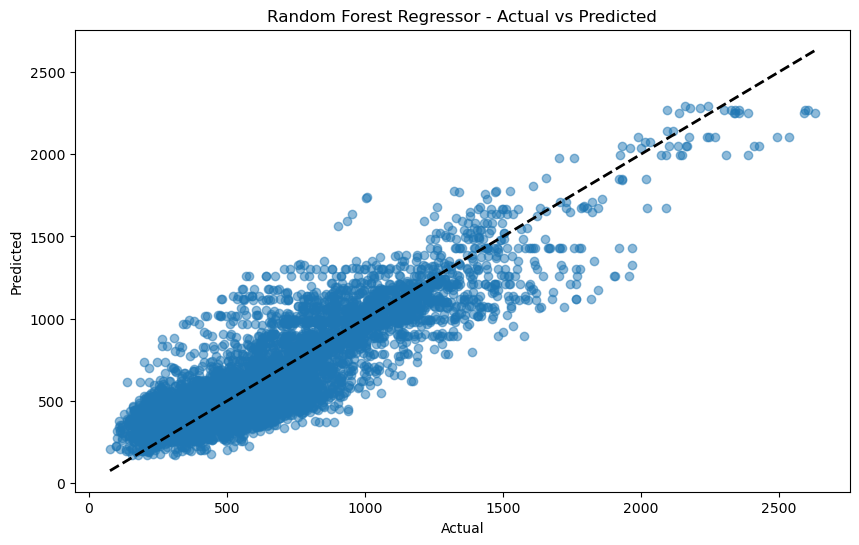

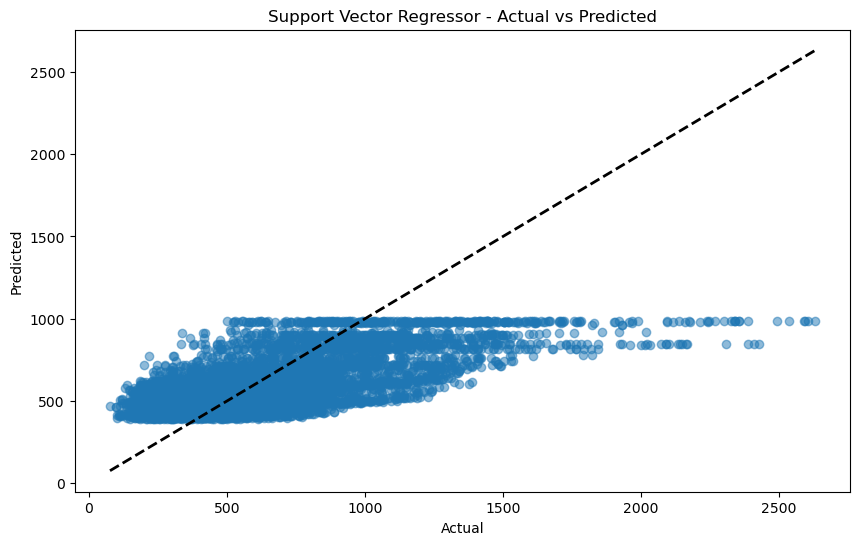

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
import matplotlib.pyplot as plt
import cv2
import random

# Function to visualize actual vs predicted values
def visualize_results(y_valid, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_valid, y_pred, alpha=0.5)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
    plt.show()

# Function to plot bounding boxes
def plot_bounding_boxes(image_path, true_boxes, pred_boxes):
    image = cv2.imread(image_path)
    for box in true_boxes:
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)  # Green for true boxes
    for box in pred_boxes:
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 0, 255), 2)  # Red for predicted boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage
# Visualize results for each model
for name, model in models.items():
    if name == 'Support Vector Regressor':
        y_preds = np.zeros_like(y_valid)
        for i, target in enumerate(['xmin', 'ymin', 'xmax', 'ymax']):
            y_preds[:, i] = svr_models[target].predict(X_valid)
        visualize_results(y_valid.flatten(), y_preds.flatten(), f'{name} - Actual vs Predicted')
    else:
        y_pred = model.predict(X_valid)
        visualize_results(y_valid.flatten(), y_pred.flatten(), f'{name} - Actual vs Predicted')

# Plot bounding boxes for a few random samples
for _ in range(3):
    idx = random.randint(0, len(valid_df)-1)
    
    true_boxes = [valid_df.iloc[idx][['xmin', 'ymin', 'xmax', 'ymax']].values]
    pred_boxes = [models['Random Forest Regressor'].predict([X_valid.iloc[idx]])[0]]
   
